In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1.Indian EV Market Analysis 2010-2023

In [2]:
# Load the dataset
df0=pd.read_csv('Final Datasets/IEA Global EV Data 2024.csv')

In [3]:
# Glimpse of data
print("Columns in the dataset:\n")
print(df0.columns)
print("\nFirst few rows of the dataset:")
print(df0.head())

Columns in the dataset:

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

First few rows of the dataset:
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  


In [4]:
# Unique values of each columns
for col in df0.columns:
    unique_values=df0[col].unique()
    print(f"Unique values in column '{col}': {unique_values}\n")

Unique values in column 'region': ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']

Unique values in column 'category': ['Historical' 'Projection-STEPS' 'Projection-APS']

Unique values in column 'parameter': ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']

Unique values in column 'mode': ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']

Unique values in colu

In [5]:
# Filtering the data
df_Indian =df0[(df0['region'] == 'India')&
            (df0['category'] == 'Historical')&
            (df0['mode'] == 'Cars')&
            (df0['powertrain'].isin(['EV', 'BEV', 'PHEV']))].reset_index(drop=True)

In [6]:
df_Indian.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [7]:
df_Indian.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
1,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
2,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
3,India,Historical,EV stock share,Cars,EV,2010,percent,0.005000
4,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000022


In [8]:
for col in df_Indian.columns:
    unique_values=df_Indian[col].unique()
    print(f"Unique values in column '{col}': {unique_values}\n")

Unique values in column 'region': ['India']

Unique values in column 'category': ['Historical']

Unique values in column 'parameter': ['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'Oil displacement Mbd' 'Oil displacement, million lge'
 'Electricity demand']

Unique values in column 'mode': ['Cars']

Unique values in column 'powertrain': ['BEV' 'EV' 'PHEV']

Unique values in column 'year': [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]

Unique values in column 'unit': ['Vehicles' 'percent' 'Milion barrels per day'
 'Oil displacement, million lge' 'GWh']

Unique values in column 'value': [4.50000000e+02 8.80000000e+02 2.09999997e-02 4.99999989e-03
 2.20000002e-05 1.29999995e+00 4.50000007e-05 2.59999990e+00
 6.69999979e-03 5.60000017e-02 1.30000000e+03 1.40000000e+03
 1.90000000e+02 2.80000000e+03 7.19999988e-03 1.20000001e-02
 4.99999987e-05 2.90000010e+00 1.60000008e-02 2.90000000e+03
 4.10000000e+02 1.00000000e+03 3.40000000e+03 3.79999988e-02
 1.3

In [9]:
df_Indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      99 non-null     object 
 1   category    99 non-null     object 
 2   parameter   99 non-null     object 
 3   mode        99 non-null     object 
 4   powertrain  99 non-null     object 
 5   year        99 non-null     int64  
 6   unit        99 non-null     object 
 7   value       99 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 6.3+ KB


In [10]:
df_Indian1 = df_Indian[['parameter', 'powertrain', 
               'year', 'unit', 'value']]
df_Indian1

,parameter,powertrain,year,unit,value
0,EV sales,BEV,2010,Vehicles,450.000000
1,EV stock,BEV,2010,Vehicles,880.000000
2,EV sales share,EV,2010,percent,0.021000
3,EV stock share,EV,2010,percent,0.005000
4,Oil displacement Mbd,EV,2010,Milion barrels per day,0.000022
...,...,...,...,...,...
94,EV sales share,EV,2023,percent,2.000000
95,EV stock,BEV,2023,Vehicles,150000.000000
96,EV sales,BEV,2023,Vehicles,82000.000000
97,EV sales,PHEV,2023,Vehicles,270.000000


In [11]:
df_Indian2 = df_Indian1[['parameter', 'year', 'value']].groupby(['parameter', 'year']).sum()
df_Indian2

value
parameter                     year        
EV sales                      2010   450.0
                              2011  1400.0
                              2012   190.0
                              2013   410.0
                              2014  1000.0
...                                    ...
Oil displacement, million lge 2019     7.0
                              2020     8.5
                              2021    20.0
                              2022    72.0
                              2023   150.0

[89 rows x 1 columns]

In [12]:
df_Indian1.parameter.unique()

array(['EV sales', 'EV stock', 'EV sales share', 'EV stock share',
       'Oil displacement Mbd', 'Oil displacement, million lge',
       'Electricity demand'], dtype=object)

In [13]:
df_Indian2.loc['EV sales share']

,value
year,
2010,0.0210
2011,0.0560
2012,0.0072
2013,0.0160
2014,0.0380
2015,0.0170
2016,0.0260
2017,0.0310
2018,0.0300


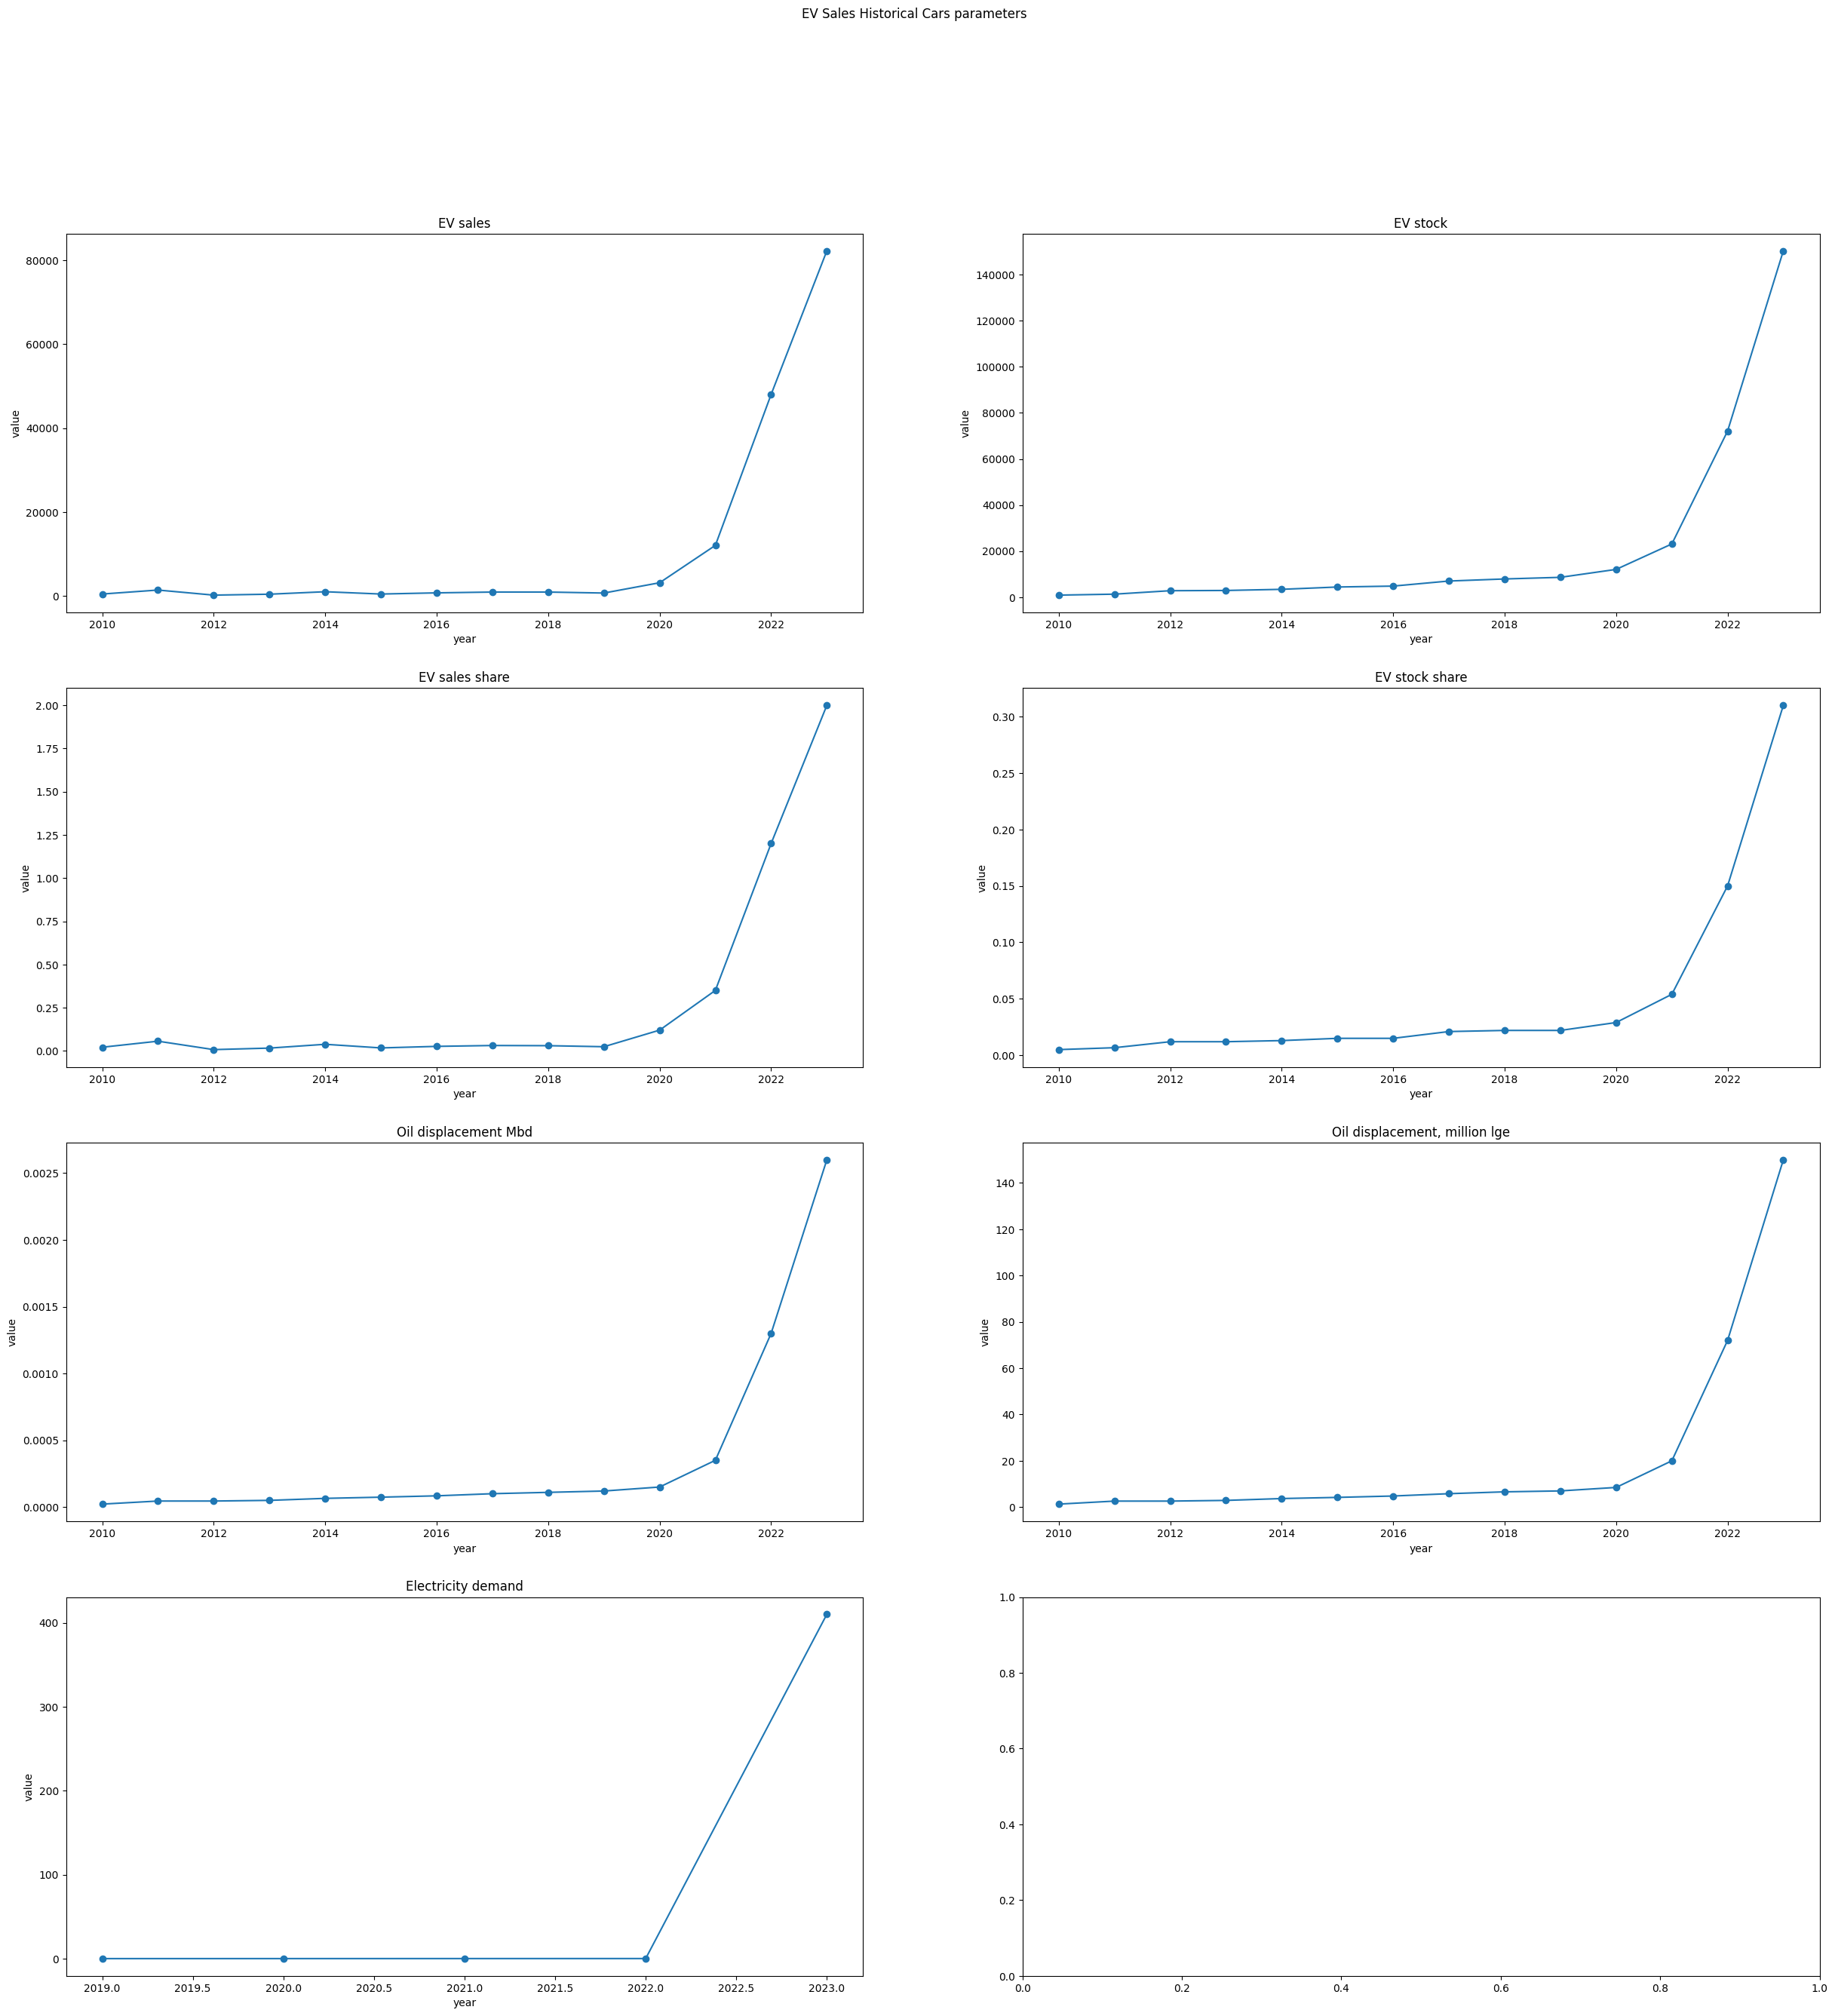

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(30, 30))
axs = axs.flatten()
parameters = df_Indian1.parameter.unique()
for ax, parameter in zip(axs, parameters):
    temp = df_Indian2.loc[parameter]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(parameter)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('EV Sales Historical Cars parameters')
#plt.savefig('EV Sales Historical Cars parameters.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
df_Indian3 = df_Indian1[['powertrain', 'year', 'value']].groupby(['powertrain', 'year']).sum()
df_Indian3

value
powertrain year               
BEV        2010    1330.000000
           2011    2700.000000
           2012    2990.000000
           2013    3310.000000
           2014    4400.000000
           2015    4850.000000
           2016    5530.000000
           2017    7920.000000
           2018    8820.000000
           2019    9280.000000
           2020   15100.000000
           2021   35000.000000
           2022  120000.000000
           2023  232000.000000
EV         2010       1.326022
           2011       2.662745
           2012       2.619245
           2013       2.928050
           2014       3.751065
           2015       4.232074
           2016       4.841084
           2017       5.852100
           2018       6.652110
           2019       7.050020
           2020       8.672150
           2021      20.457350
           2022      73.425300
           2023     562.312600
PHEV       2019      14.000000
           2020      93.000000
           2021     150.000000
           2022     143.000000
           2023     660.000000

In [16]:
df_Indian1.powertrain.unique()

array(['BEV', 'EV', 'PHEV'], dtype=object)

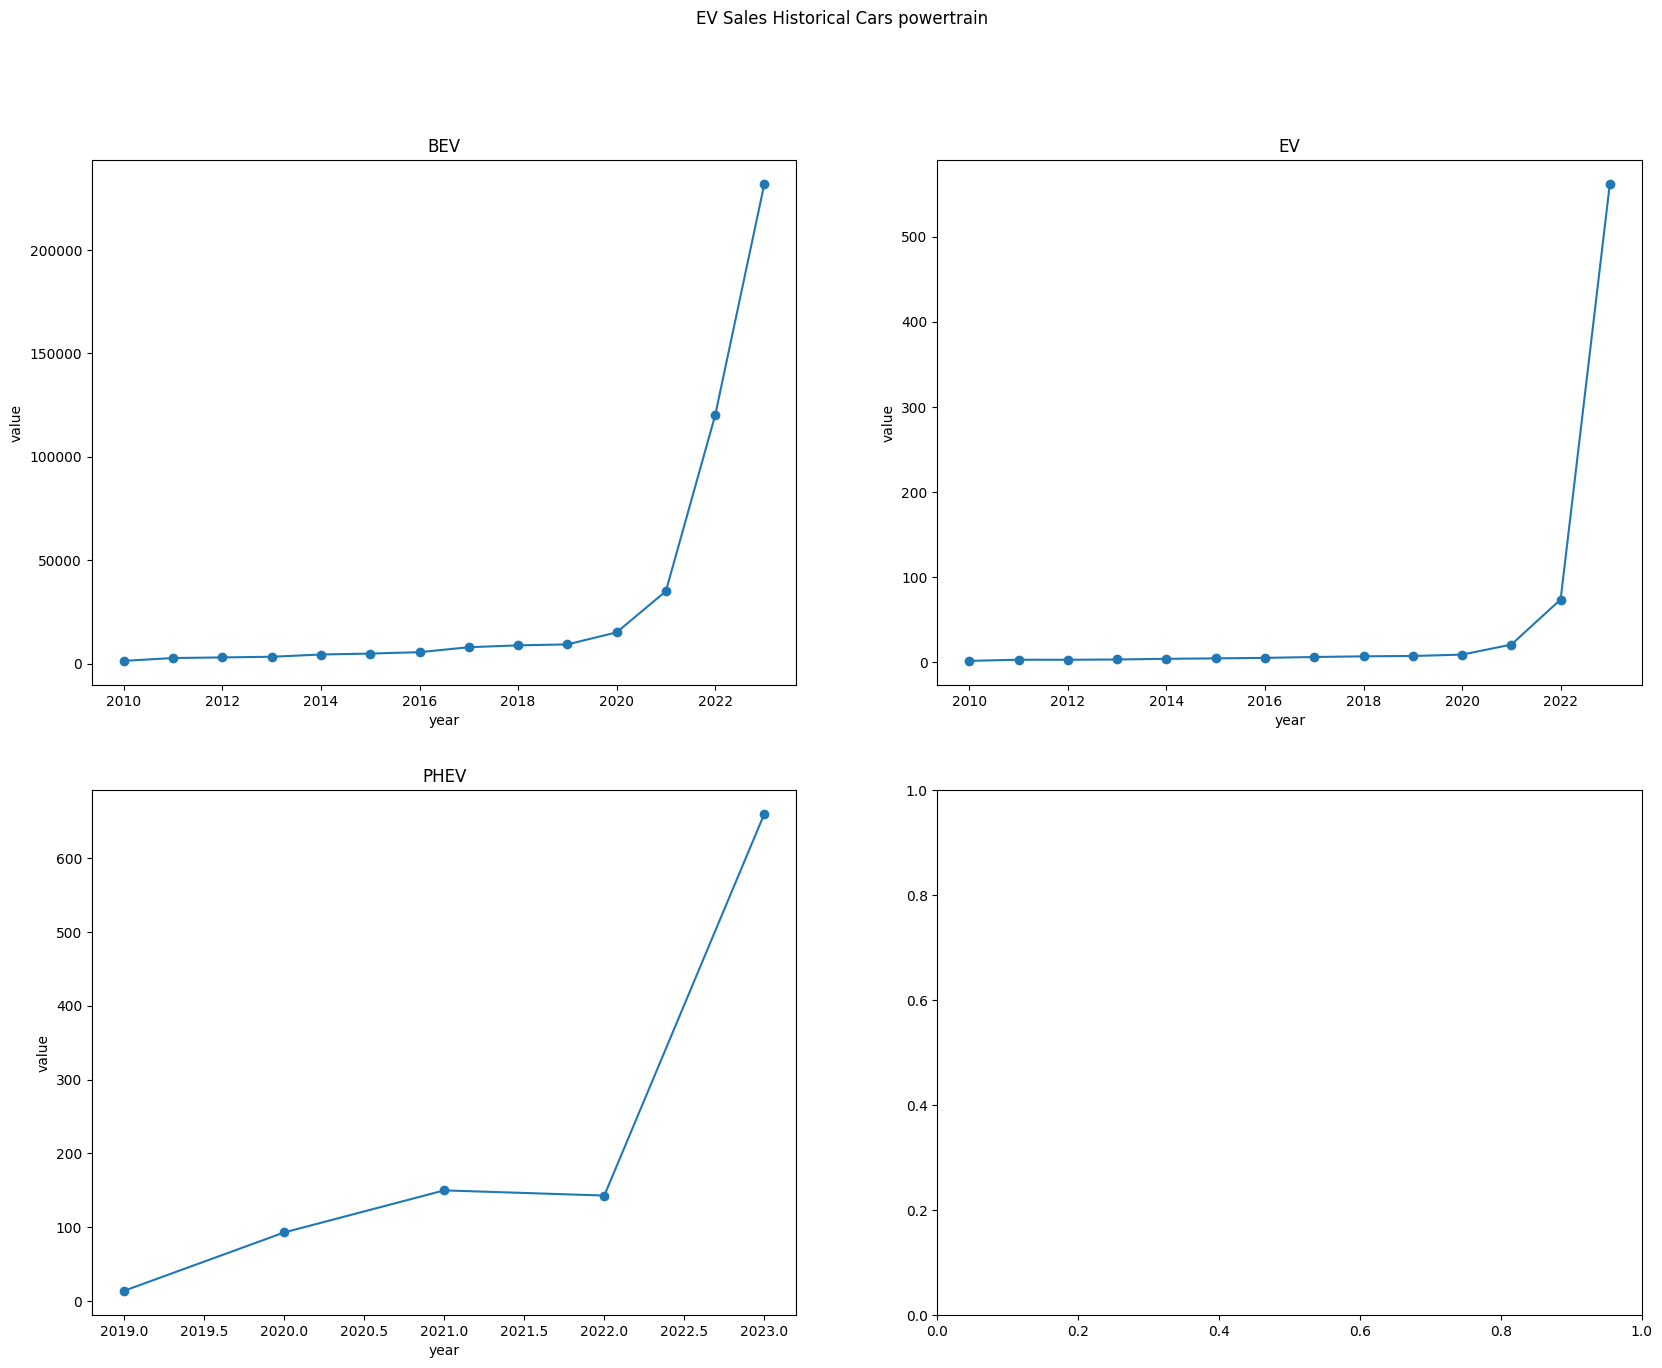

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()
powertrains = df_Indian1.powertrain.unique()
for ax, powertrain in zip(axs, powertrains):
    temp = df_Indian3.loc[powertrain]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(powertrain)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('EV Sales Historical Cars powertrain')
plt.savefig('EV Sales Historical Cars powertrain.png', dpi=300, bbox_inches='tight')
plt.show()

### PCA

In [18]:
df_Indian1.head()

,parameter,powertrain,year,unit,value
0,EV sales,BEV,2010,Vehicles,450.000000
1,EV stock,BEV,2010,Vehicles,880.000000
2,EV sales share,EV,2010,percent,0.021000
3,EV stock share,EV,2010,percent,0.005000
4,Oil displacement Mbd,EV,2010,Milion barrels per day,0.000022


In [19]:
df_Indian4 = df_Indian1.copy()  

label_encoders = [LabelEncoder() for _ in range(5)]

for le, column in zip(label_encoders, df_Indian4.columns):
    df_Indian4.loc[:, column] = le.fit_transform(df_Indian4[column])

standard_scaler = StandardScaler()

df_Indian4_scaled = standard_scaler.fit_transform(df_Indian4)

df_Indian4_scaled = pd.DataFrame(df_Indian4_scaled, columns=df_Indian4.columns)

df_Indian4_scaled[:5]


,parameter,powertrain,year,unit,value
0,-1.307302,-1.381440,-1.757727,0.251311,0.836329
1,-0.341459,-1.381440,-1.757727,0.251311,0.958447
2,-0.824380,0.306987,-1.757727,1.109234,-0.832628
3,0.141462,0.306987,-1.757727,1.109234,-1.158278
4,1.107304,0.306987,-1.757727,-1.464535,-1.728166


In [20]:
pca = PCA(n_components=5)
df_Indian4_scaled_pca = pca.fit_transform(df_Indian4_scaled)
df_Indian4_scaled_pca[:5]

array([[-1.86347876, -1.81494589, -0.19292422, -0.45499639,  0.67734606],
       [-1.36643311, -1.91482691, -0.52975333,  0.27188783,  0.45616972],
       [-0.41751032, -1.43690707,  1.84830105, -0.19813888,  0.30434236],
       [ 0.3158646 , -1.62072668,  1.71359815,  0.30751746, -0.13547287],
       [ 2.38140856, -1.85046665,  0.10683594, -0.53495271,  0.38531163]])

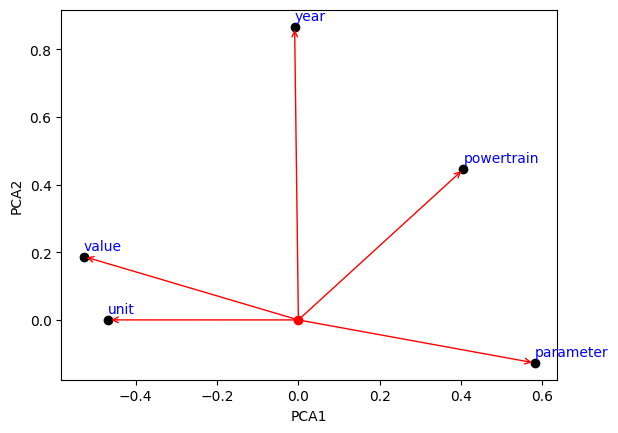

In [21]:
def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x,y,name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

pca_plot(pca, df_Indian1)

# 2. EV sales by Makers 2015-2024

In [22]:
df01=pd.read_csv('Final Datasets/ev_sales_by_makers_and_cat_15-24.csv')

In [23]:
# Glimpse of data
print("Columns in the dataset:\n", df01.columns)
print("\nFirst few rows of the dataset:")
df01.head()

Columns in the dataset:
 Index(['Cat', 'Maker', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')

First few rows of the dataset:


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,VOLVO GROUP INDIA PVT LTD,0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [24]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [25]:
df01.isna().sum()

Cat      0
Maker    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
2024     0
dtype: int64

In [26]:
# Unique values of each columns
for col in df01.columns:
    unique_values=df01[col].unique()
    print(f"Unique values in column '{col}': {unique_values}\n")

Unique values in column 'Cat': ['3W' '2W' 'LMV' 'MMV']

Unique values in column 'Maker': ['VOLVO GROUP INDIA PVT LTD' '3EV INDUSTRIES PVT LTD'
 '3GB TECHNOLOGY PVT LTD' ... 'ZHONGHUALONG (IMPORTER: POWORO PVT LTD)'
 'ZHONGXING (IMPORTER:GREENO AUTOMOBILE)' 'ZOHAN TRADERS AND BIG METRO']

Unique values in column '2015': [   0    6    1   31   35  161   37  669    2    4   16   10  178   44
    3   15   33  254   63   19   92  134  119   26   13   29    8   39
    5  877   23  462    9   51  110 1708   40   56   38  140    7  227
   17  326  165   22  107  780]

Unique values in column '2016': [    0     1     2     8     3    39    32     6    80    15    10     5
   397  1299    99    78    58  1321    57   147    43    24     9   311
   492    46   157   136     7  1573    14    27     4   763   282    55
   361   177   195    73    19    97   627    37    61    22   246    94
    34    54    81   152    31   248    95    36   137    48    12  2005
   250   190   133   400   441   210

In [27]:
# Sum sales across all years for each maker
df01['Total_Sales'] = df01.iloc[:, 2:].sum(axis=1) 


In [28]:
df01.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total_Sales
0,3W,VOLVO GROUP INDIA PVT LTD,0,0,31,12,0,0,0,0,0,0,43
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51,1098
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0,1
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0,2
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578,1069


In [29]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cat          1386 non-null   object
 1   Maker        1386 non-null   object
 2   2015         1386 non-null   int64 
 3   2016         1386 non-null   int64 
 4   2017         1386 non-null   int64 
 5   2018         1386 non-null   int64 
 6   2019         1386 non-null   int64 
 7   2020         1386 non-null   int64 
 8   2021         1386 non-null   int64 
 9   2022         1386 non-null   int64 
 10  2023         1386 non-null   int64 
 11  2024         1386 non-null   int64 
 12  Total_Sales  1386 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 140.9+ KB


In [30]:
ev_sales = df01.drop(columns=['Cat'])
print(ev_sales.dtypes)


Maker          object
2015            int64
2016            int64
2017            int64
2018            int64
2019            int64
2020            int64
2021            int64
2022            int64
2023            int64
2024            int64
Total_Sales     int64
dtype: object


In [31]:
# Find the maker with the highest sales for each category
highest_sales = df01.groupby('Cat').apply(lambda x: x.loc[x['Total_Sales'].idxmax()])

# Display results
print("Makers with the highest sales in each category:")
print(highest_sales[['Cat', 'Maker', 'Total_Sales']])



Makers with the highest sales in each category:
     Cat                                 Maker  Total_Sales
Cat                                                        
2W    2W     OLA ELECTRIC TECHNOLOGIES PVT LTD       588266
3W    3W                   YC ELECTRIC VEHICLE       152944
LMV  LMV  TATA PASSENGER ELECTRIC MOBILITY LTD        74410
MMV  MMV                       TATA MOTORS LTD          702


C:\Users\hp\AppData\Local\Temp\ipykernel_7112\2824675716.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_sales = df01.groupby('Cat').apply(lambda x: x.loc[x['Total_Sales'].idxmax()])


In [32]:
# Identify all columns that are numeric years
year_columns = [col for col in df01.columns if col.isdigit()]

# Reshape the data from wide to long format, only using year columns
df_long = pd.melt(df01, id_vars=['Cat', 'Maker'], 
                  value_vars=year_columns, var_name='Year', value_name='Sales')

df_long['Year'] = pd.to_numeric(df_long['Year'])



In [33]:
# Find the maker with the highest sales for each year and category
highest_sales_year_cat = df_long.groupby(['Year', 'Cat']).apply(lambda x: x.loc[x['Sales'].idxmax()]).reset_index(drop=True)

# Display results
print("Year-wise and category-wise makers with the highest sales:\n")
print(highest_sales_year_cat[['Year', 'Cat', 'Maker', 'Sales']])


Year-wise and category-wise makers with the highest sales:

    Year  Cat                                 Maker   Sales
0   2015   2W         HERO ELECTRIC VEHICLE PVT LTD     254
1   2015   3W                                OTHERS    1708
2   2015  LMV    MAHINDRA ELECTRIC MOBILITY LIMITED     462
3   2015  MMV                      DIVYA INDUSTRIES       1
4   2016   2W         HERO ELECTRIC VEHICLE PVT LTD     246
5   2016   3W                                OTHERS   13401
6   2016  LMV           MAHINDRA & MAHINDRA LIMITED     344
7   2016  MMV                    KION INDIA PVT LTD       2
8   2017   2W                                OTHERS     382
9   2017   3W                                OTHERS   15094
10  2017  LMV                                OTHERS     581
11  2017  MMV                       TATA MOTORS LTD       4
12  2018   2W              OKINAWA AUTOTECH PVT LTD    8452
13  2018   3W                   YC ELECTRIC VEHICLE   10816
14  2018  LMV           MAHINDRA & MAHIN

C:\Users\hp\AppData\Local\Temp\ipykernel_7112\729128311.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_sales_year_cat = df_long.groupby(['Year', 'Cat']).apply(lambda x: x.loc[x['Sales'].idxmax()]).reset_index(drop=True)


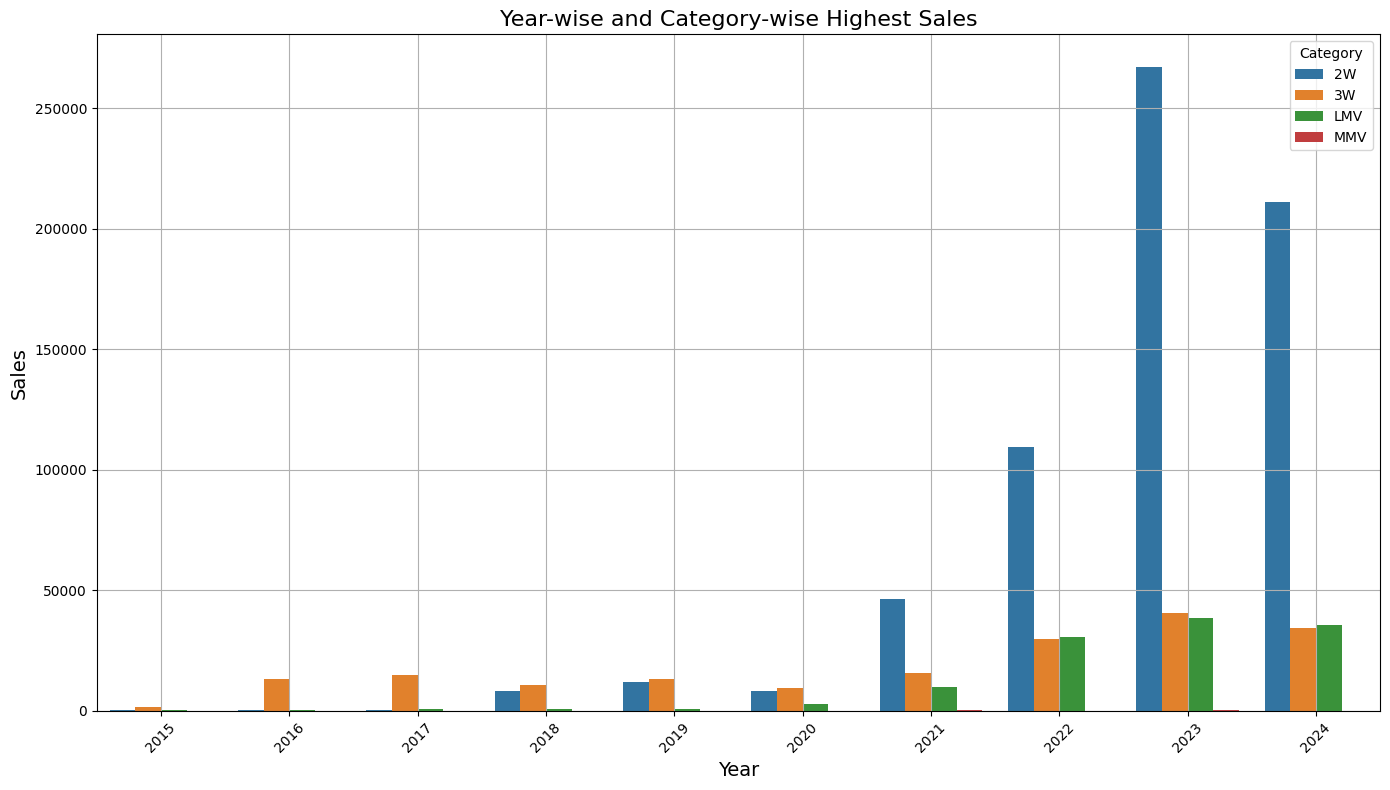

In [34]:
# Plot for the highest sales
plt.figure(figsize=(14, 8))
sns.barplot(data=highest_sales_year_cat, x='Year', y='Sales', hue='Cat', dodge=True)
plt.title('Year-wise and Category-wise Highest Sales', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
#plt.savefig('EV sales Category(2W,3W,LMV,MMV).png', dpi=300, bbox_inches='tight')
plt.show()


In [35]:

df_long1 = pd.melt(df01, id_vars=['Cat'], var_name='Year', value_name='Sales')

# Group by category and sum up the sales
category_sales1 = df_long.groupby('Cat')['Sales'].sum().reset_index()

# Sort by total sales in descending order for better visualization
category_sales1 = category_sales1.sort_values(by='Sales', ascending=False)

print("Total number of EV sales by all Category EV Makers\n",category_sales1)


Total number of EV sales by all Category EV Makers
    Cat    Sales
0   2W  2279448
1   3W  1934263
2  LMV   206388
3  MMV      804


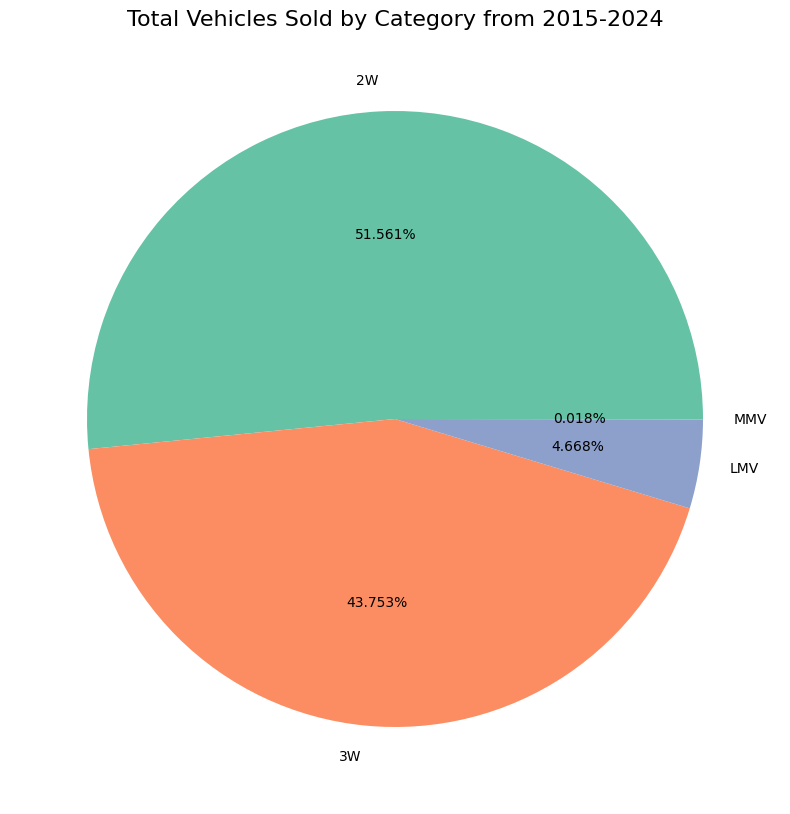

In [36]:
# Set up the figure
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(
    category_sales1['Sales'], 
    labels=category_sales1['Cat'], 
    autopct='%1.3f%%', 
    colors=plt.get_cmap('Set2').colors
)

plt.title('Total Vehicles Sold by Category from 2015-2024', fontsize=16)
#plt.savefig('Pie EV Sold by category from 2015-2024.png', dpi=300, bbox_inches='tight')
plt.show()


# 3. EV Makers by Place

In [37]:
# Loading the dataset
df02 = pd.read_csv('EV Maker by Place.csv')

In [38]:
df02.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [39]:
df02.shape

(62, 3)

In [40]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [41]:
df02['EV Maker'].unique()

array(['Tata Motors', 'Mahindra Electric', 'Ather Energy',
       'Hero Electric', 'Ola Electric', 'Ashok Leyland',
       'TVS Motor Company', 'Bajaj Auto', 'MG Motor India',
       'Hyundai Motor India', 'Revolt Motors', 'Ampere Vehicles',
       'Okinawa Autotech', 'Kinetic Green Energy', 'BYD India',
       'JBM Auto', 'Piaggio Vehicles', 'Hero MotoCorp',
       'Etrio Automobiles', 'Triton Electric', 'Simple Energy',
       'Minda Industries', 'Exide Industries', 'Greaves Cotton',
       'Maruti Suzuki India', 'Renault India', 'Citroën India',
       'Audi India', 'Mercedes-Benz India', 'Kia Motors India',
       'Volvo Eicher', 'JSW Energy', 'Olectra Greentech', 'Force Motors',
       'TVS Electronics', 'Royal Enfield', 'Bharat Forge',
       'Hindustan Motors', 'Atul Auto', 'SML Isuzu', 'Mahindra Reva',
       'Ajanta Manufacturing', 'Tata Power', 'Ashok Leyland (EV Bus)',
       'HOP Electric Mobility', 'Omega Seiki Mobility', 'Bajaj Auto (EV)',
       'Tata AutoComp Systems', 

In [42]:
df02['Place'].unique()

array(['Pune', 'Bengaluru', 'New Delhi', 'Krishnagiri', 'Chennai',
       'Hosur', 'Halol', 'Gurgaon', 'Coimbatore', 'Bhiwadi',
       'Sriperumbudur', 'Faridabad', 'Baramati', 'Dharuhera', 'Hyderabad',
       'Bhuj', 'Kolkata', 'Mumbai', 'Manesar', 'Thiruvallur',
       'Aurangabad', 'Chakan', 'Anantapur', 'Pithampur', 'Uttarpara',
       'Rajkot', 'Ropar', 'Morbi', 'Alwar', 'Jaipur', 'Akurdi',
       'Kashipur', 'Gurugram', 'Ahmednagar', 'Delhi', 'Ahmedabad'],
      dtype=object)

In [43]:
df02['State'].unique()

array(['Maharashtra', 'Karnataka', 'Delhi', 'Tamil Nadu', 'Gujarat',
       'Haryana', 'Rajasthan', 'Telangana', 'West Bengal',
       'Andhra Pradesh', 'Madhya Pradesh', 'Punjab', 'Uttarakhand'],
      dtype=object)

In [44]:
for i in df02.columns:
    print(f'{i}:\n{df02[i].unique()}')

EV Maker:
['Tata Motors' 'Mahindra Electric' 'Ather Energy' 'Hero Electric'
 'Ola Electric' 'Ashok Leyland' 'TVS Motor Company' 'Bajaj Auto'
 'MG Motor India' 'Hyundai Motor India' 'Revolt Motors' 'Ampere Vehicles'
 'Okinawa Autotech' 'Kinetic Green Energy' 'BYD India' 'JBM Auto'
 'Piaggio Vehicles' 'Hero MotoCorp' 'Etrio Automobiles' 'Triton Electric'
 'Simple Energy' 'Minda Industries' 'Exide Industries' 'Greaves Cotton'
 'Maruti Suzuki India' 'Renault India' 'Citroën India' 'Audi India'
 'Mercedes-Benz India' 'Kia Motors India' 'Volvo Eicher' 'JSW Energy'
 'Olectra Greentech' 'Force Motors' 'TVS Electronics' 'Royal Enfield'
 'Bharat Forge' 'Hindustan Motors' 'Atul Auto' 'SML Isuzu' 'Mahindra Reva'
 'Ajanta Manufacturing' 'Tata Power' 'Ashok Leyland (EV Bus)'
 'HOP Electric Mobility' 'Omega Seiki Mobility' 'Bajaj Auto (EV)'
 'Tata AutoComp Systems' 'Bosch India' 'Lohia Auto Industries'
 'Saera Electric Auto' 'Jezza Motors' 'Altigreen Propulsion Labs'
 'Terra Motors India' 'Gayam Moto

In [45]:
# Grouping by State and aggregating EV Maker names
state_ev_makers = df02.groupby('State')['EV Maker'].apply(lambda x: ', '.join(x.unique())).reset_index()

# Renaming columns for clarity
state_ev_makers.columns = ['State', 'EV Maker Names']

# Adding a column for the number of distinct EV makers
state_ev_makers['Number of EV Makers'] = state_ev_makers['EV Maker Names'].apply(lambda x: len(x.split(', ')))

state_ev_makers


,State,EV Maker Names,Number of EV Makers
0,Andhra Pradesh,Kia Motors India,1
1,Delhi,"Hero Electric, YC Electric Vehicle, Dilli Elec...",4
2,Gujarat,"MG Motor India, Triton Electric, Atul Auto, Aj...",5
3,Haryana,"Revolt Motors, JBM Auto, Hero MotoCorp, Maruti...",6
4,Karnataka,"Mahindra Electric, Ather Energy, Simple Energy...",6
5,Madhya Pradesh,Volvo Eicher,1
6,Maharashtra,"Tata Motors, Bajaj Auto, Kinetic Green Energy,...",15
7,Punjab,SML Isuzu,1
8,Rajasthan,"Okinawa Autotech, Ashok Leyland (EV Bus), HOP ...",4
9,Tamil Nadu,"Ola Electric, Ashok Leyland, TVS Motor Company...",11


In [46]:
# Display state-wise EV makers along with their numbers
for index, row in state_ev_makers.iterrows():
    print(f"State: {row['State']}")
    print(f"Number of EV Makers: {row['Number of EV Makers']}")
    print(f"EV Maker Names: {row['EV Maker Names']}")
    print("-" * 40)


State: Andhra Pradesh
Number of EV Makers: 1
EV Maker Names: Kia Motors India
----------------------------------------
State: Delhi
Number of EV Makers: 4
EV Maker Names: Hero Electric, YC Electric Vehicle, Dilli Electric Auto Pvt Ltd, Euler Motors
----------------------------------------
State: Gujarat
Number of EV Makers: 5
EV Maker Names: MG Motor India, Triton Electric, Atul Auto, Ajanta Manufacturing, Electrotherm India
----------------------------------------
State: Haryana
Number of EV Makers: 6
EV Maker Names: Revolt Motors, JBM Auto, Hero MotoCorp, Maruti Suzuki India, Omega Seiki Mobility, Terra Motors India
----------------------------------------
State: Karnataka
Number of EV Makers: 6
EV Maker Names: Mahindra Electric, Ather Energy, Simple Energy, Mahindra Reva, Bosch India, Altigreen Propulsion Labs
----------------------------------------
State: Madhya Pradesh
Number of EV Makers: 1
EV Maker Names: Volvo Eicher
----------------------------------------
State: Maharashtra


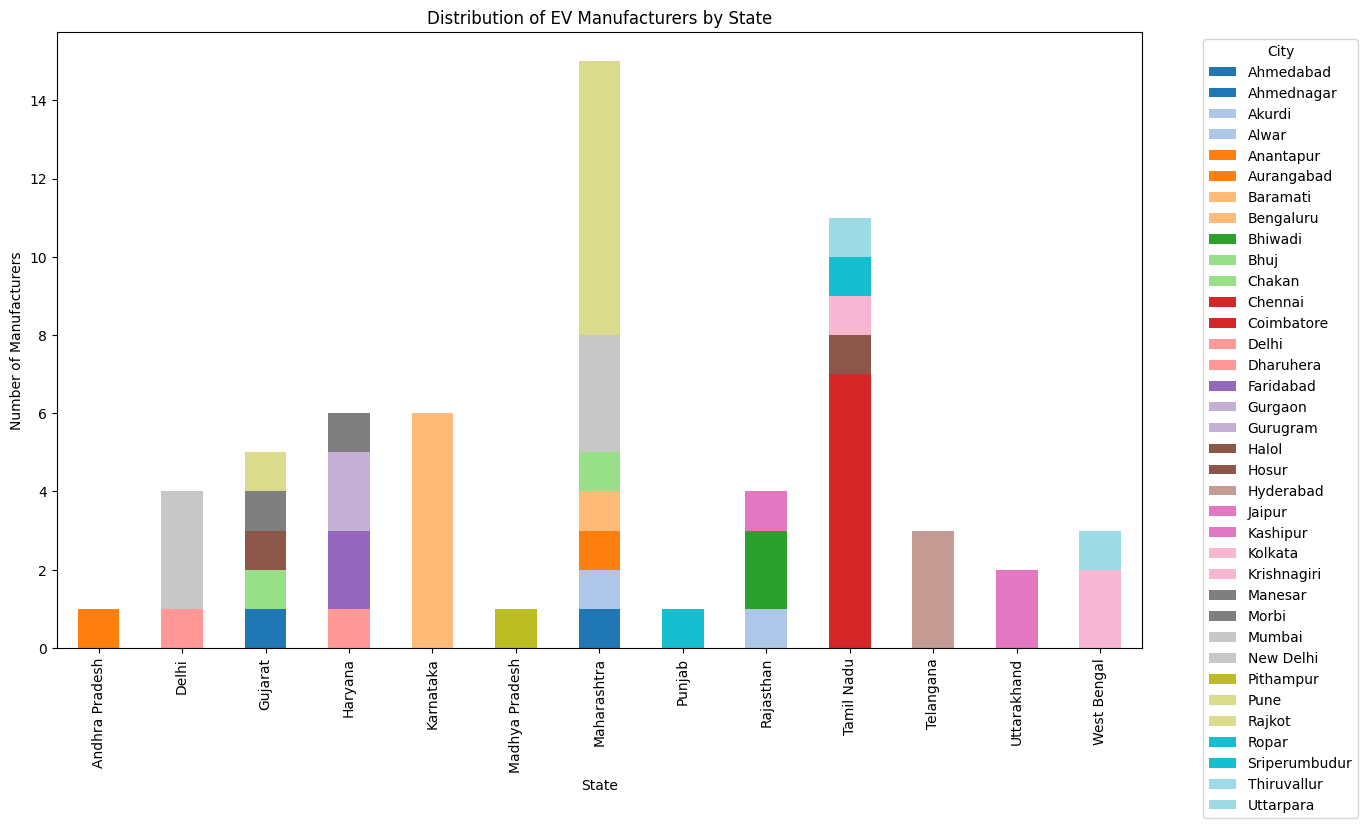

In [47]:
pivot_table = df02.pivot_table(index='State', columns='Place',
                             aggfunc='size',fill_value=0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribution of EV Manufacturers by State')
plt.xlabel('State')
plt.ylabel('Number of Manufacturers')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('EV Makers by State.png', dpi=300, bbox_inches='tight')
plt.show()


In [48]:
df02.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


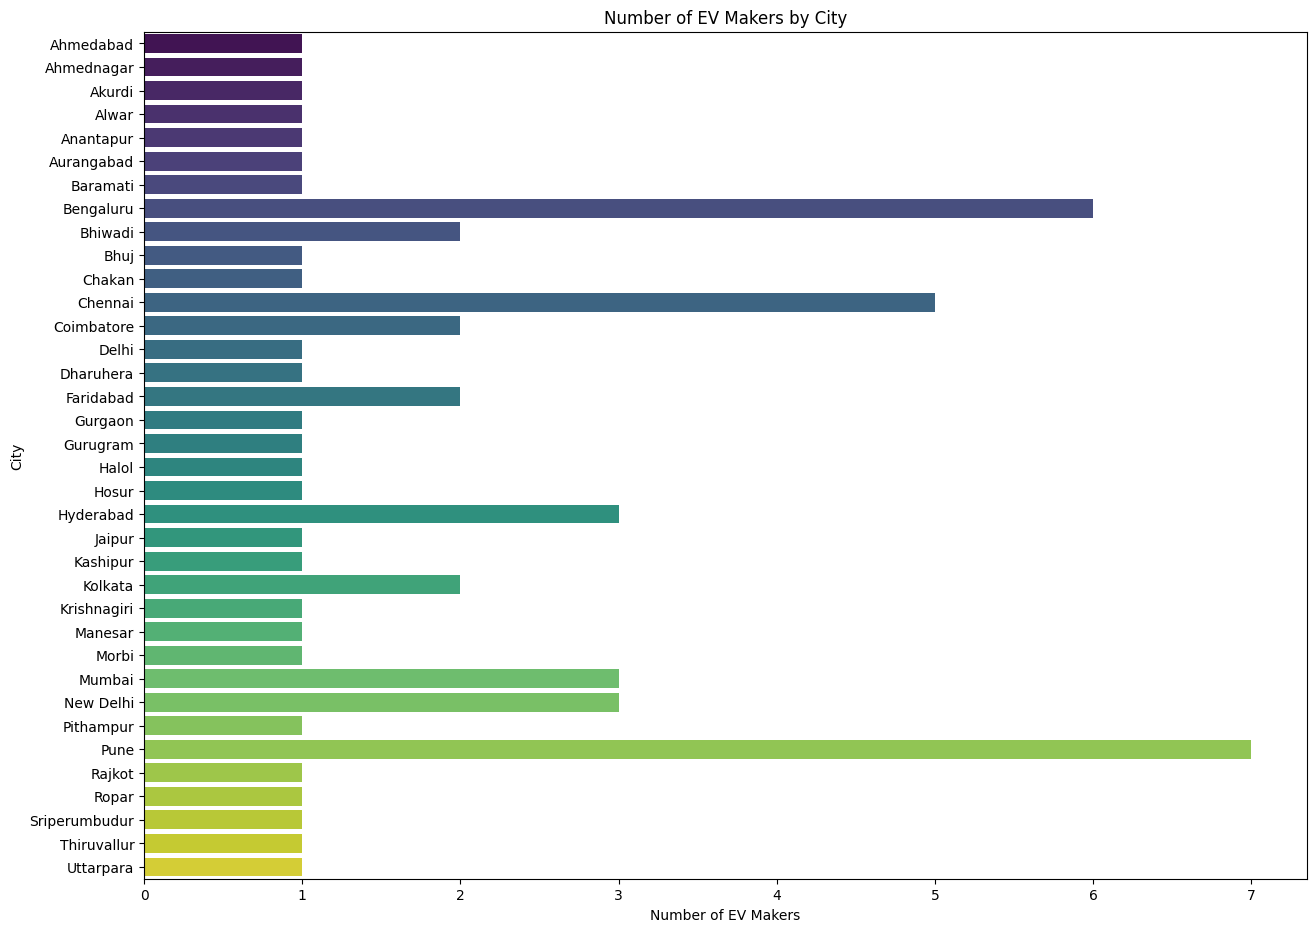

In [49]:
# Count distinct EV Makers by state and city
distinct_makers_by_state = df02.groupby('State')['EV Maker'].nunique().reset_index()
distinct_makers_by_city = df02.groupby('Place')['EV Maker'].nunique().reset_index()

# Visualize distinct EV Makers by city
plt.figure(figsize=(15, 11))
sns.barplot(x='EV Maker', y='Place', data=distinct_makers_by_city, hue='Place', palette='viridis')
plt.title('Number of EV Makers by City')
plt.xlabel('Number of EV Makers')
plt.ylabel('City')
#plt.savefig('EV Makers by Place.png', dpi=300, bbox_inches='tight')
plt.show()


# 4. Total Operational Public Charging Stations for EV available in each state

In [50]:
df03=pd.read_csv('Final Datasets/OperationalPC.csv')

In [51]:
df03.head()

,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


In [52]:
df03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes


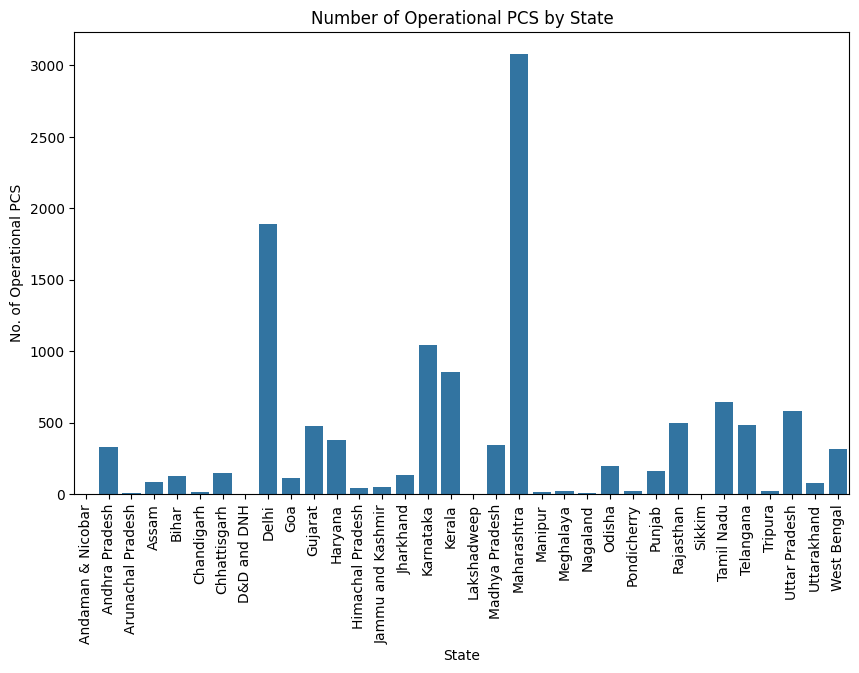

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='No. of Operational PCS', data=df03)
plt.xticks(rotation=90)
plt.title('Number of Operational PCS by State')
#plt.savefig('Operational Public Charging Stations by State.png', dpi=300, bbox_inches='tight')
plt.show()


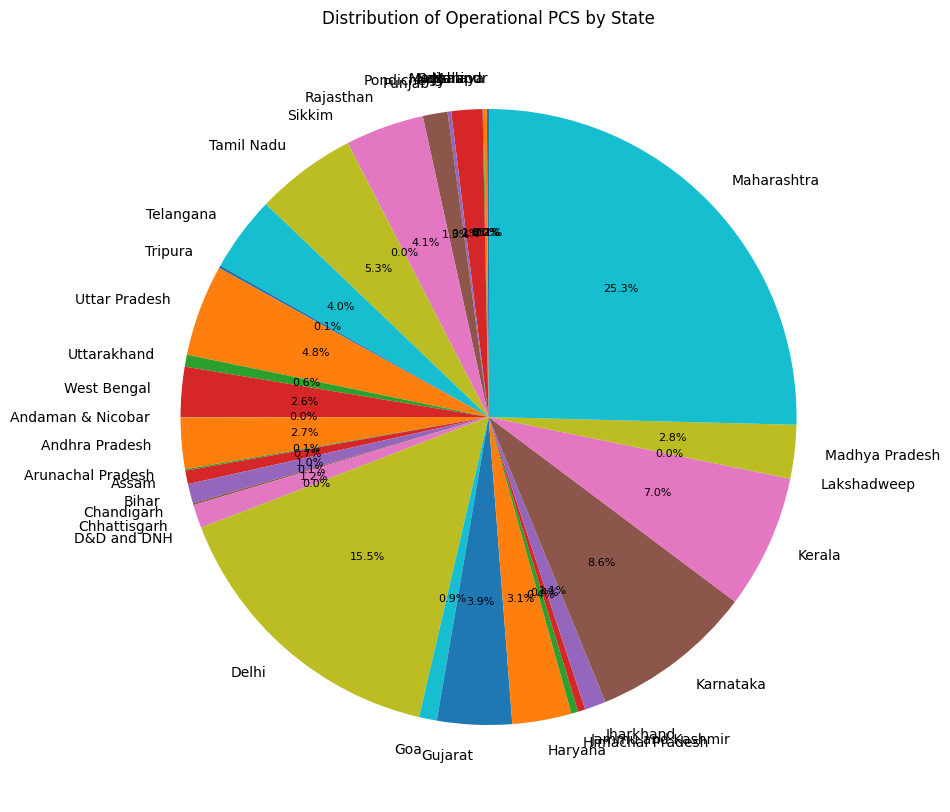

In [55]:
# Create the pie chart
plt.figure(figsize=(10, 10))
# Use a lambda function for autopct
wedges, texts, autotexts = plt.pie(df03['No. of Operational PCS'], 
                                   labels=df03['State'], 
                                   autopct='%1.1f%%', 
                                   startangle=180, 
                                   labeldistance=1.1)

# Set the font size of the percentage labels (autotexts)
for autotext in autotexts:
    autotext.set_fontsize(8)  # Adjust the fontsize here

plt.title('Distribution of Operational PCS by State')
#plt.savefig('Pie Distribution of Public Charging Stations by State.png', dpi=300, bbox_inches='tight')
plt.show()
